<center><font color='#7a7773'><h1> Historical weather analyses Rotterdam</h1></font></center>

<img src='clouds.svg' width=250> 
<br>
<br>
<br>

<center> made by <a href="https://github.com/ErfPy">Erfan Nariman</a></center>
<center> date: 15-12-2018 </center>

## Import the packages that are needed in this project

In [1]:
import pandas as pd
import json
import time
from datetime import datetime as dt
import os
import matplotlib.pyplot as plt

plt.style.use('seaborn')

#### filter the files from the directory on _.json_ extention and put the filenames in a list 

In [2]:
# empty list to fill while iterating through the files
files = list()

# put the filename of files with extention .json in our files list
for file in os.listdir():
    if file.endswith('.json'):
        files.append(file)
                
files = sorted(files, key=str.lower)

#### import the two json files as _citylist_ and _weatherdata_

- `citylist` contains the id of the city _Rotterdam_ which we want to analyze
- `weatherdata` obviously contains data of the weather

In [3]:
# open the citylist file and load it as json
with open(files[0], encoding='utf-8') as f:
    citylist = json.load(f)

# open the weatherdata and load it as json
with open(files[1], encoding='utf-8') as f:
    weatherdata = json.load(f)

In [4]:
print(f'weather has {len(weatherdata)} entrys')
print(f'citylist has {len(citylist)} entrys')

weather has 41273 entrys
citylist has 209579 entrys


### Find the cityid of _Rotterdam_ and put the `id` and `name` in variables

In [5]:
for i in citylist:
    if i['name'] == 'Rotterdam' and i['country'] == 'NL':
        print(i)
        print(i['id'], i['name'])
        cityname = i['name']
        cityid = i['id']

{'id': 2747891, 'name': 'Rotterdam', 'country': 'NL', 'coord': {'lon': 4.47917, 'lat': 51.922501}}
2747891 Rotterdam


### Pars the weatherdata en convert it to a `pandas dataframe`

In [6]:
temp = list()
temp_min = list()
temp_max = list()
pressure = list()
humidity = list()
wind_speed = list()
wind_deg = list()
weather_id = list()
weather_main = list()
weather_descr = list()
date = list()
date_unix = list()


for entry in weatherdata:
    temp.append(entry['main']['temp'])
    temp_min.append(entry['main']['temp_min'])
    temp_max.append(entry['main']['temp_max'])
    pressure.append(entry['main']['pressure'])
    humidity.append(entry['main']['humidity'])
    wind_speed.append(entry['wind']['speed'])
    wind_deg.append(entry['wind']['deg'])
    weather_id.append(entry['weather'][0]['id'])
    weather_main.append(entry['weather'][0]['main'])
    weather_descr.append(entry['weather'][0]['description'])
    date.append(entry['dt_iso'])
    date_unix.append(entry['dt'])

### define the dataframes columns

In [7]:
weatherdata_df = pd.DataFrame()

weatherdata_df['temperature_celsius'] = temp
weatherdata_df['temperature_min_celsius'] = temp_min
weatherdata_df['temperature_max_celsius'] = temp_max
weatherdata_df['pressure_hpa'] = pressure
weatherdata_df['humidity_%'] = humidity
weatherdata_df['wind_speed_m/s'] = wind_speed
weatherdata_df['wind_degrees'] = wind_deg
weatherdata_df['weather_id'] = weather_id
weatherdata_df['weather_main'] = weather_main
weatherdata_df['weather_descr'] = weather_descr
weatherdata_df['date_UTC'] = date
weatherdata_df['date_unix'] = date_unix


### function convert kelvin to celsius degrees

In [8]:
def kelv_to_cels(df, column):
    df[column] = df[column] - 273.15    

In [9]:
kelv_to_cels(weatherdata_df, 'temperature_celsius')
kelv_to_cels(weatherdata_df, 'temperature_min_celsius')
kelv_to_cels(weatherdata_df, 'temperature_max_celsius')

In [10]:
weatherdata_df.dtypes

temperature_celsius        float64
temperature_min_celsius    float64
temperature_max_celsius    float64
pressure_hpa                 int64
humidity_%                   int64
wind_speed_m/s               int64
wind_degrees                 int64
weather_id                   int64
weather_main                object
weather_descr               object
date_UTC                    object
date_unix                    int64
dtype: object

In [11]:
weatherdata_df['date_unix'] = pd.to_datetime(weatherdata_df['date_unix'], unit='s')
weatherdata_df['date_UTC'] = weatherdata_df['date_UTC'].map(lambda x: x.replace('UTC', ''))
weatherdata_df['date_UTC'] = weatherdata_df['date_UTC'].map(lambda x: x.replace('+', ''))
weatherdata_df['date_UTC'] = weatherdata_df['date_UTC'].map(lambda x: x[:-5])

weatherdata_df['date_UTC'] = pd.to_datetime(weatherdata_df['date_UTC'], format='%Y-%m-%d %H:%M:%S')

weatherdata_df['Month'] = weatherdata_df.date_UTC.dt.month

In [12]:
weatherdata_df.dtypes

temperature_celsius               float64
temperature_min_celsius           float64
temperature_max_celsius           float64
pressure_hpa                        int64
humidity_%                          int64
wind_speed_m/s                      int64
wind_degrees                        int64
weather_id                          int64
weather_main                       object
weather_descr                      object
date_UTC                   datetime64[ns]
date_unix                  datetime64[ns]
Month                               int64
dtype: object

In [13]:
round(weatherdata_df.describe(), 2)

,temperature_celsius,temperature_min_celsius,temperature_max_celsius,pressure_hpa,humidity_%,wind_speed_m/s,wind_degrees,weather_id,Month
count,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00
mean,11.97,10.65,13.44,1015.71,81.41,3.94,189.44,691.84,6.67
std,6.48,6.19,6.96,10.45,15.63,2.55,96.78,150.33,3.38
min,-7.39,-10.00,-7.00,968.00,0.00,0.00,0.00,200.00,1.00
25%,7.00,6.00,8.00,1010.00,72.00,2.00,110.00,521.00,4.00
50%,12.21,11.00,13.36,1016.00,86.00,4.00,203.00,800.00,7.00
75%,16.61,15.00,18.33,1022.00,93.00,5.00,260.00,802.00,9.00
max,34.58,33.33,38.33,1052.00,100.00,57.00,360.00,804.00,12.00


In [14]:
two_fourteen = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2014]
two_fifteen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2015]
two_sixteen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2016]
two_seventeen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2017]
two_eighteen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2018]

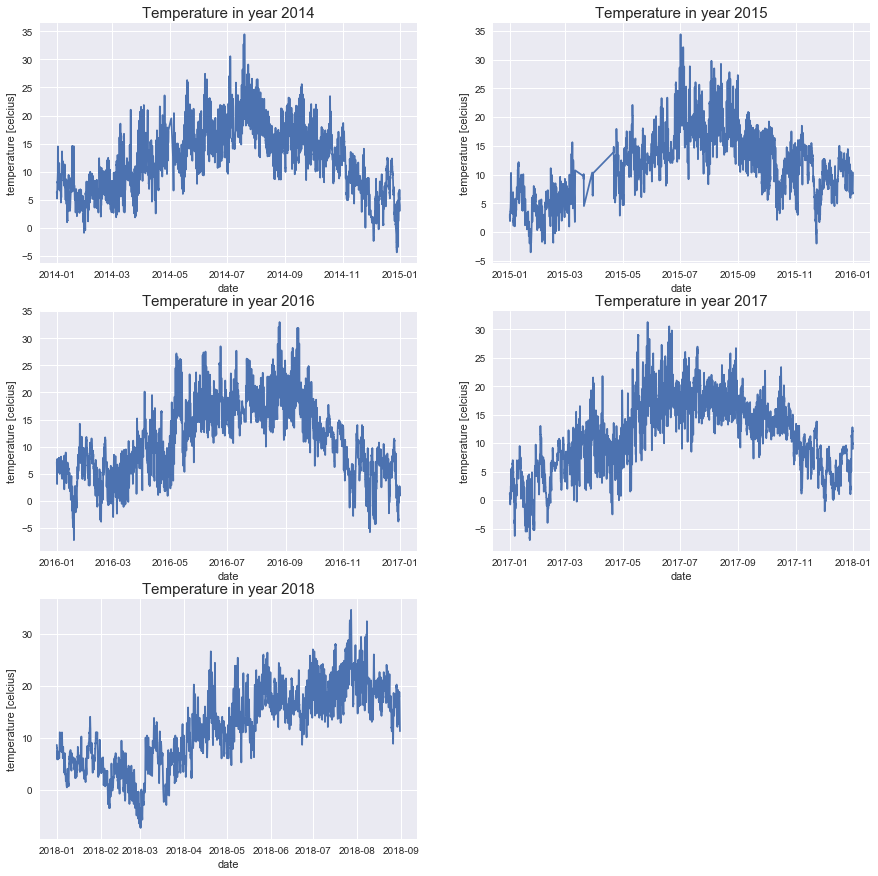

In [43]:
def subplot(df, year, y_index, x_index):
    plt.subplot2grid((3,3), (y_index, x_index))
    plt.plot(df['date_UTC'], df['temperature_celsius'])
    plt.ylabel('temperature [celcius]', fontsize=11)
    plt.xlabel('date', fontsize=11)
    plt.title(f'Temperature in year {year}', fontsize=15)


fig = plt.figure(figsize=(23, 15))

# year 2014
subplot(two_fourteen, 2014, 0, 0)

# year 2015
subplot(two_fifteen, 2015, 0, 1)

# year 2016
subplot(two_sixteen, 2016, 1, 0)

# year 2017
subplot(two_seventeen, 2017, 1, 1)

#year 2018
subplot(two_eighteen, 2018, 2, 0)

plt.show()

### year 2015 seems to miss data in around april. Lets plot it bigger to have a look at it

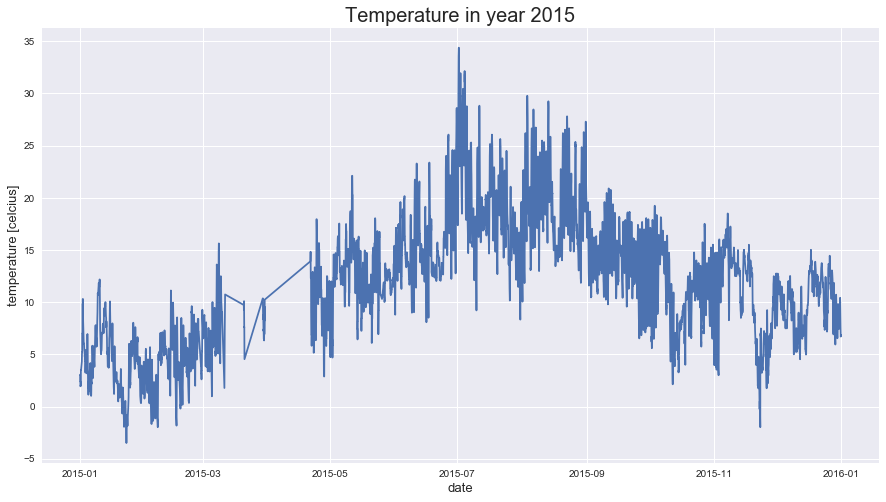

In [16]:
fig = plt.figure(figsize=(15,8))

plt.plot(two_fifteen['date_UTC'], two_fifteen['temperature_celsius'])
plt.ylabel('temperature [celcius]', fontsize=13)
plt.xlabel('date', fontsize=13)
plt.title('Temperature in year 2015', fontsize=20)

plt.show()

In [19]:
two_fifteen.groupby('Month').size()

Month
1     604
2     539
3     198
4     113
5     518
6     720
7     744
8     745
9     719
10    701
11    397
12    438
dtype: int64

In [20]:
weatherdata_df.weather_main.value_counts()

Clouds          15492
Rain             9396
Clear            7087
Mist             5802
Drizzle          1966
Fog               926
Haze              331
Thunderstorm      155
Snow              115
Smoke               1
TORNADO             1
Squall              1
Name: weather_main, dtype: int64

In [21]:
weatherdata_df.groupby('weather_main').agg({'temperature_celsius': 'mean', 
                                            'wind_speed_m/s' : 'mean',
                                            'pressure_hpa' : 'mean'})

,temperature_celsius,wind_speed_m/s,pressure_hpa
weather_main,,,
Clear,13.669223,3.452236,1020.315366
Clouds,12.800532,4.266847,1016.644720
Drizzle,10.943733,4.717192,1010.292981
Fog,8.048477,1.490281,1020.379050
Haze,13.611782,3.256798,1015.468278
Mist,8.905231,2.555670,1018.070838
Rain,11.814066,4.693380,1010.157514
Smoke,9.140000,2.000000,1027.000000
Snow,0.281130,5.426087,1005.426087
